<a href="https://colab.research.google.com/github/VickkiMars/CV_Mastery/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/wobotintelligence/face-mask-detection-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: victorthamartian
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/wobotintelligence/face-mask-detection-dataset


100%|██████████| 2.50G/2.50G [00:42<00:00, 63.7MB/s]


In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [6]:
! pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.5 MB/s eta 0:00:00


In [7]:
from mtcnn.mtcnn import MTCNN

In [19]:
image_path = os.path.join("face-mask-detection-dataset","Medical mask", "Medical mask", "Medical Mask", "images")
submission_path = os.path.join("face-mask-detection-dataset", "submission.csv")
train_path = os.path.join("face-mask-detection-dataset", "train.csv")
annotations = os.path.join("face-mask-detection-dataset","Medical mask", "Medical mask","Medical Mask", "annotations")

In [11]:
train = pd.read_csv(train_path)
submission = pd.read_csv(submission_path)

print(train.head(), "\nLength: ", len(train))

       name   x1   x2   y1   y2       classname
0  2756.png   69  126  294  392  face_with_mask
1  2756.png  505   10  723  283  face_with_mask
2  2756.png   75  252  264  390   mask_colorful
3  2756.png  521  136  711  277   mask_colorful
4  6098.jpg  360   85  728  653    face_no_mask 
Length:  15412


In [13]:
print(submission.head(), "\nLength: ", len(submission))

       name  x1  x2  y1  y2  classname
0  1800.jpg NaN NaN NaN NaN        NaN
1  1800.jpg NaN NaN NaN NaN        NaN
2  1800.jpg NaN NaN NaN NaN        NaN
3  1799.jpg NaN NaN NaN NaN        NaN
4  1799.jpg NaN NaN NaN NaN        NaN 
Length:  8142


In [21]:
print("Number of images: {}".format(len(os.listdir(image_path))))

Number of images: 6024


In [25]:
sorted_images, sorted_annotations = os.listdir(image_path), os.listdir(annotations)
sorted_images.sort(); sorted_annotations.sort()

In [29]:
sorted_images[:10], sorted_annotations[:10]

(['0001.jpg',
  '0002.png',
  '0003.jpg',
  '0004.jpg',
  '0005.jpg',
  '0006.jpg',
  '0007.jpg',
  '0009.jpg',
  '0010.jpg',
  '0011.jpg'],
 ['1801.jpg.json',
  '1802.jpg.json',
  '1803.jpg.json',
  '1804.jpg.json',
  '1805.jpg.json',
  '1806.jpg.json',
  '1807.jpg.json',
  '1808.jpg.json',
  '1809.jpg.json',
  '1810.jpg.json'])

In [30]:
split = int(0.8 * len(sorted_images))
train_images = sorted_images[:split]
test_images = sorted_images[split:]

print("Train images: {}, Test images: {}".format(len(train_images), len(test_images)))

Train images: 4819, Test images: 1205


In [33]:
def plot_image(no, images=image_path):
  for i in range(no):
    img = plt.imread(os.path.join(images, test_images[i]))
    plt.imshow(img)
    plt.show()

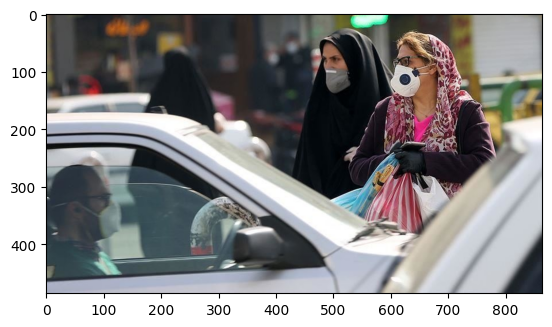

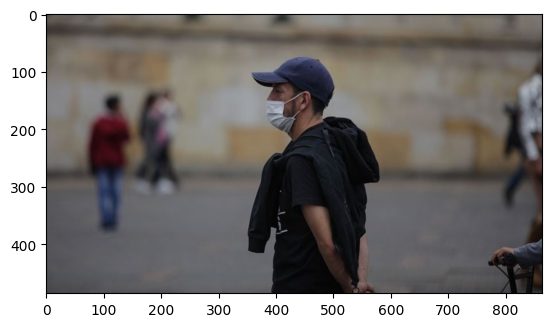

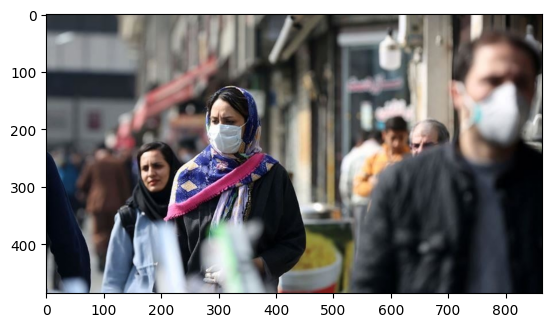

In [34]:
plot_image(3)

In [36]:
classes = ['face_with_mask', 'face_with_no_mask']

bbox = [] # Bounding Box
for i in range(len(train)):
  arr = []
  for j in train.iloc[i][["x1","x2","y1","y2"]]:
    arr.append(j)
  bbox.append(arr)
train["bbox"] = bbox

In [61]:
def get_boxes(id):
  boxes = []
  for i in train[train["name"] == str(id)]["bbox"]:
    print(i)
    boxes.append(i)
  return boxes

In [76]:
def plot_bbox(id):
  fig, ax = plt.subplots(1)
  img = plt.imread(os.path.join(image_path, id))
  ax.imshow(img)
  boxes = get_boxes(id)
  for box in boxes:
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
  plt.show()

In [62]:
img = train_images[3]
get_boxes(img)

[]

In [72]:
classes = train["classname"].unique().tolist()

<BarContainer object of 20 artists>

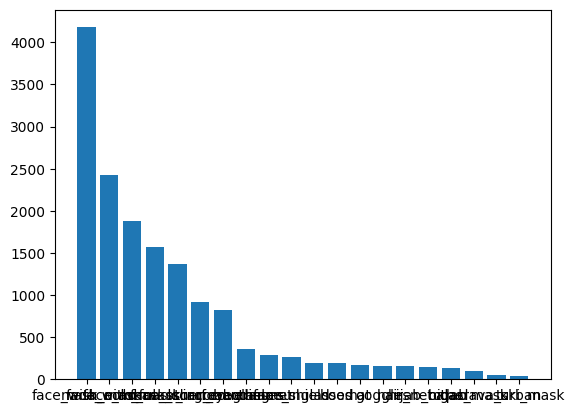

In [86]:
plt.bar(classes, train["classname"].value_counts())

In [81]:
train_images[1]

'0002.png'

In [85]:
train[train["name"] == train_images[231]]

,name,x1,x2,y1,y2,classname,bbox
